In [ ]:
## ESSENTIAL LIBRARIES

In [271]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup

In [ ]:
## SETUP SELENIUM WITH CHROME

In [273]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')  
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [275]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [ ]:
## OPENING AMAZON SEARCH PAGE

In [276]:
all_products = []

In [309]:
def get_amazon_slides(page=1):
    url = f"https://www.amazon.in/s?k=laptop&crid=RD8J8YNJSFFJ&sprefix=laptop+%2Caps%2C676&ref=nb_sb_noss_2={page}"
    try:
        driver.get(url)
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        products = []

        for product in soup.select("div.s-result-item[data-asin]"):
            brand = product.select_one("span.a-size-base-plus")
            title = product.select_one("h2 span")
            price = product.select_one(".a-price .a-offscreen")
            rating = product.select_one(".a-icon-alt")
            reviews = product.select_one("span.a-size-base.s-underline-text")

if products and price:
    products.append({
        "Product name": title.text.strip(),
        "Price": price.text.strip(),
        "Ratings": ratings.text.strip() if ratings else "N/A",
        "Number of reviews": numberofreviews.text.strip() if numberofreviews else "N/A",
    })

        print(f"Page {page}: Found {len(products)} products")
        return products

    except Exception as e:
        print(f"Error loading page {page}: {e}")
        return []

SyntaxError: expected 'except' or 'finally' block (3447412550.py, line 16)

In [ ]:
## LOOPING THROUGH PRODUCTS AND EXTRACTION OF DATA

In [279]:
all_products = []
for page in range(1, 21):
    print(f"Scraping page {page}...")
    products = get_amazon_slides(page)
    if not products:
        print("No products or possibly blocked. Stopping...")
        break
    all_products.extend(products)
    time.sleep(2)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...


In [281]:
driver.quit()

In [ ]:
## IMPORTING OF REQUIRED LIBRARIES

In [282]:
import pandas as pd

In [ ]:
## CLEANING THE DATA

In [285]:
df=pd.read_csv(r"C:\Users\Charumathi\Downloads\LAPTOP DATASET.csv")

In [287]:
df.head()

,Product Name,Price,Category,Ratings,Number of Reviews
0,Apple Laptop 6772,29737,Laptop,4.5,222
1,Acer Laptop 2673,26406,Laptop,3.5,230
2,Lenovo Laptop 1748,32774,Laptop,5.0,674
3,Asus Laptop 8025,32636,Laptop,3.5,698
4,Avita Laptop 6099,30679,Laptop,3.0,685


In [289]:
df.shape

(400, 5)

In [291]:
df.columns

Index(['Product Name', 'Price', 'Category', 'Ratings', 'Number of Reviews'], dtype='object')

In [48]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [50]:
df.dropna(subset=['Product Name', 'Price'], inplace=True)

In [297]:
df.drop_duplicates(inplace=True)

In [46]:
df.reset_index(drop=True, inplace=True)

In [301]:
df['Category'] = df['Category'].str.strip().str.title()

In [ ]:
## UNSUPERVISED LEARNING 

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv(r"C:\Users\Charumathi\Downloads\LAPTOP DATASET.csv")

In [20]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [22]:
df.dropna(subset=['Price', 'Ratings', 'Number of Reviews'], inplace=True)

In [24]:
features = df[['Price', 'Ratings', 'Number of Reviews']]

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [28]:
wcss = []

In [30]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

D:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

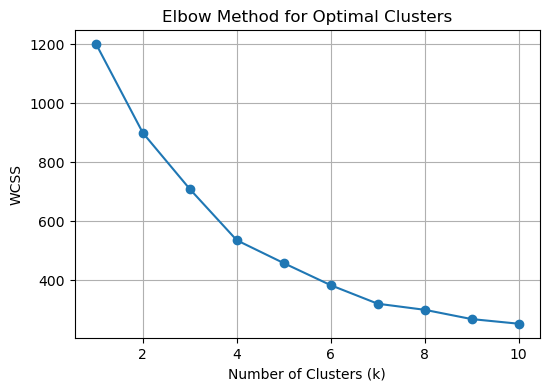

In [36]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

D:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


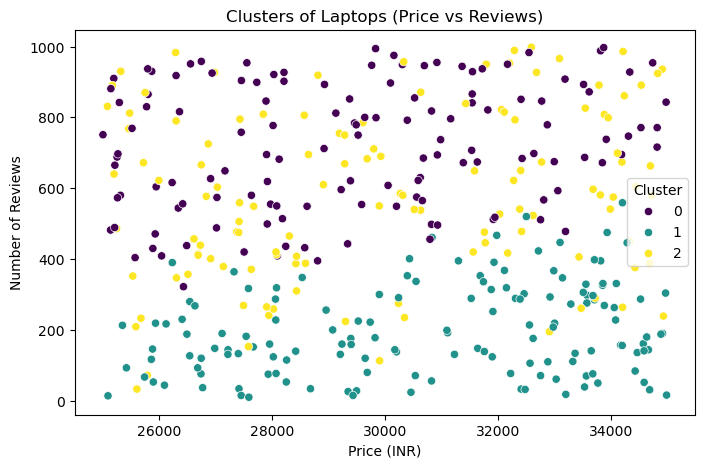

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Number of Reviews', hue='Cluster', palette='viridis')
plt.title("Clusters of Laptops (Price vs Reviews)")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
## EXPLORATORY ANALYSIS

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

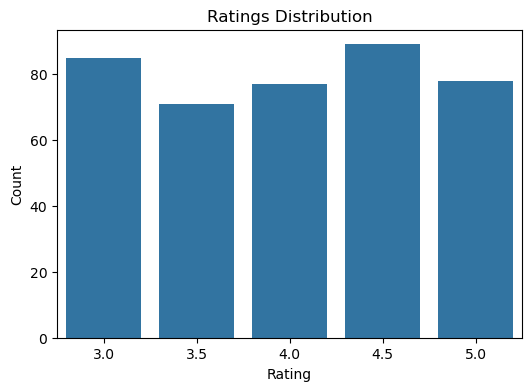

In [311]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ratings', data=df)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

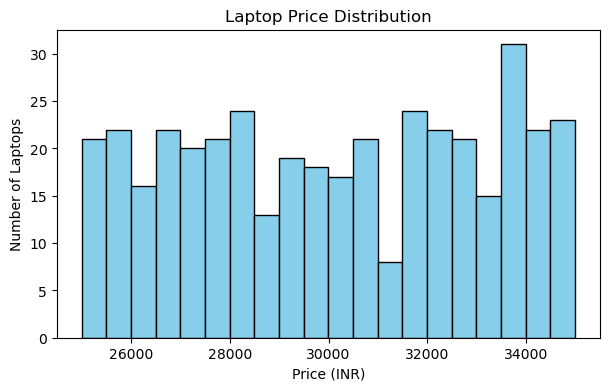

In [38]:
plt.figure(figsize=(7, 4))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Laptop Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Laptops")
plt.show()

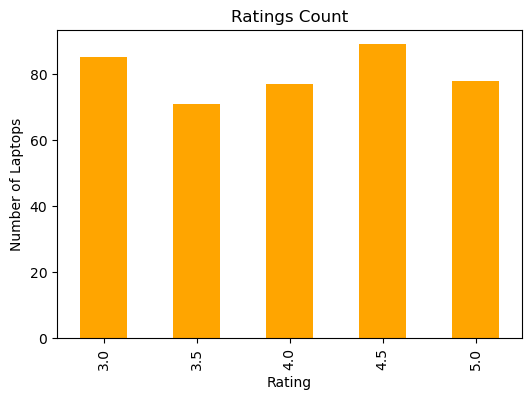

In [40]:
plt.figure(figsize=(6, 4))
df['Ratings'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Ratings Count")
plt.xlabel("Rating")
plt.ylabel("Number of Laptops")
plt.show()

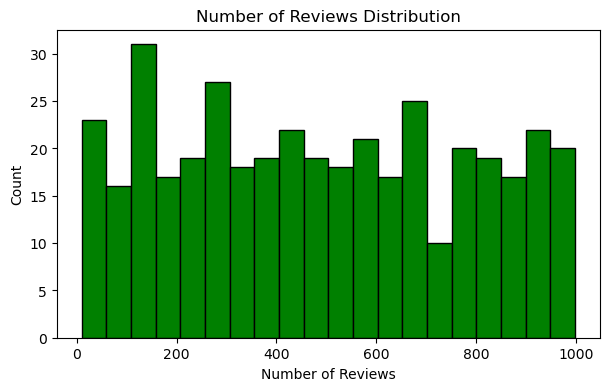

In [42]:
plt.figure(figsize=(7, 4))
plt.hist(df['Number of Reviews'], bins=20, color='green', edgecolor='black')
plt.title("Number of Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

In [ ]:
## SUPERVISED LEARNING

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [363]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [321]:
df = pd.read_csv(r"C:\Users\Charumathi\Downloads\LAPTOP DATASET.csv")

In [323]:
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [325]:
df.dropna(subset=['Price', 'Ratings', 'Number of Reviews'], inplace=True)

In [327]:
df['High_Rating'] = df['Ratings'].apply(lambda x: 1 if x >= 4.0 else 0)

In [329]:
X = df[['Price', 'Number of Reviews']]
y = df['High_Rating']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [337]:
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
LOGISTIC REGRESSION

In [359]:
evaluate_model("Logistic Regression", LogisticRegression())


Logistic Regression Results:
Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      1.00      0.77        50

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80



D:\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [385]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}

In [387]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='accuracy')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [389]:
print("Best Logistic Regression Params:", grid_lr.best_params_)

Best Logistic Regression Params: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [391]:
print("Best Accuracy:", grid_lr.best_score_)

Best Accuracy: 0.6062422853112325


In [ ]:
K NEAREST NEIGHBORS

In [351]:
evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))


K-Nearest Neighbors Results:
Accuracy: 0.4875
              precision    recall  f1-score   support

           0       0.30      0.27      0.28        30
           1       0.58      0.62      0.60        50

    accuracy                           0.49        80
   macro avg       0.44      0.44      0.44        80
weighted avg       0.48      0.49      0.48        80



In [393]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [395]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [397]:
print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [399]:
print("Best Accuracy:", grid_knn.best_score_)

Best Accuracy: 0.5471110327396697


In [ ]:
RANDOM FOREST 

In [355]:
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100))


Random Forest Results:
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.46      0.43      0.45        30
           1       0.67      0.70      0.69        50

    accuracy                           0.60        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.59      0.60      0.60        80



In [365]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [371]:
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [372]:
print("\nBest Random Forest Parameters:", grid_rf.best_params_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [375]:
print("Best Accuracy:", grid_rf.best_score_)

Best Accuracy: 0.5282431082113678


In [ ]:
XG BOOSTING

In [357]:
evaluate_model("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

D:\PYTHON\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.575
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        30
           1       0.65      0.68      0.67        50

    accuracy                           0.57        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.57      0.57      0.57        80



In [377]:
xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [379]:
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                        xgb_params, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

D:\PYTHON\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:57:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\PYTHON\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:57:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\PYTHON\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\PYTHON\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\PYTHON\Lib\site-packages\xgbo

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [381]:
print("\nBest XGBoost Parameters:", grid_xgb.best_params_)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [383]:
print("Best Accuracy:", grid_xgb.best_score_)

Best Accuracy: 0.5937518368306589
